# STAT207 Mini-Project #2 - Video Game Sales Predictive Model


Isabella Iniguez

In [1]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## 1. Introduction

The primary research goal I am pursuing in this report is to build a predictive model that will effectively predict `Sales` for new datasets.

The secondary research is for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset.

The explanatory variables I will be considering are `Metrics.Review Score`, `Features.Max Players`, `Release.Console`, `Release.Rating`, and `Length.All PlayStyles.Average`.

As a fan of video games and hopeful future hobby developer, I try to understand what makes for a better player experience. The variables mentioned above are some of the aspects of a video game that I feel have the most impact on the sales of a game.

For example, the number of players able to play together can sway the perception of the game's experience as being more collabrative or isolated. I personally feel I enjoy some games more when I have friends to join in on the fun and so I often gravitate to games with multiplayer options. Maybe the number of max players is a strong predictor of the number of sales a game gets?

Professional game developers and marketers may find this answer interesting given that they'd ideally want their game to appeal to as many people as possible to boost sales. Like say a game development team was considering adding a multiplayer expansion to boost sales, this predictive model would be able to determine if this will impact how well the game sells at varying numbers of max players. It may also impact how much marketers may want to push certain aspects of some game (out of the ones used in the model) if it can possibly increase their sales.

## 2. Dataset Discussion

To answer the research question, I will be exploring the CORGIS Dataset Project's Video Games CSV File. The dataset contains information on the sales and playtime of thousands of video game titles released between 2004 and 2010. The playtime information was collected from crowd-sourced data on “How Long to Beat”. 

Each row represents a video game; however, the games observed are not inclusive of all game types. For example, while not directly stated from the source, the games observed appear to all support online play and be sequels. This means that game developers/marketers whose game does not meet one or both of these critera may find the conclusions made here to not accurately reflect their game. For example, perhaps the games being sequels already gave them exposure and hype from pre-existing fans of the initial title (thus sales are high regardless), so those whose game isn't a sequel won't find the same trends as applicable.

There is also the fact that the dataset itself is somewhat outdated, with more than a decade's worth of game releases not represented. The trends in what players value in a game may have changed in more recent years, thus game developers/marketers must keep this time difference in mind when considering how their more modern game may align with the analysis of this older dataset.

The six variables I intend to explore are:

`Metrics.Sales` - The total sales made on this game, measured in millions of dollars.

`Metrics.Review Score` - A typical review score for this game, out of 100.

`Features.Max Players` - The maximum number of players that can play this game.

`Release.Console` - The name of the console that this particular game was released for. Note that the dataset contains multiple copies of the same game, released for different consoles (e.g. Nintendo DS).

`Release.Rating` - The ESRB rating for this game, either E (for Everyone), T (for Teen), or M (for Mature).

`Length.All PlayStyles.Average` - The mean time that players reported completing the game (in any way), in hours. This is the average over all the other categories.

This file was downloaded on 9/8/2023, linked [here](https://corgis-edu.github.io/corgis/csv/video_games/).

In [2]:
df = pd.read_csv('video_games.csv')
df.head(5)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
len(df)

1212

There are 1212 rows in this dataframe.

## 3. Dataset Cleaning

First, I'll create a new dataframe with only the relevant variable columns I'll be exploring.

In [4]:
df_vars = df[["Metrics.Sales", "Metrics.Review Score", "Features.Max Players", "Release.Console", "Release.Rating", "Length.All PlayStyles.Average"]]

**Missing Value Detection and Cleaning**

Checking for any explicit missing values first, we see that there are a sum of zero NaN values present in any of the three columns. Meaning there are no explicit missing values.

Then to check for implicit missing values, we look at the types of data in every column. Given that we are expecting numerical data, any unexpected strings representing missing values would result in the column's data type being generalized to "object". The types displayed are all numerical, so there are no implicit missing values.

It is fortunate that there are no missing values since we won't have to consider how we will handle them (e.g. dropping rows or replacing values with mean). This means that the analysis will continue to consider all of the original observations without any manual skewing of data.

In [5]:
df_vars.isna().sum()

Metrics.Sales                    0
Metrics.Review Score             0
Features.Max Players             0
Release.Console                  0
Release.Rating                   0
Length.All PlayStyles.Average    0
dtype: int64

In [6]:
df_vars.dtypes

Metrics.Sales                    float64
Metrics.Review Score               int64
Features.Max Players               int64
Release.Console                   object
Release.Rating                    object
Length.All PlayStyles.Average    float64
dtype: object

**Sample Size Cleaning**

Given that three of the variables are categorical (`Features.Max Players`, `Release.Rating`, and `Release.Console`), then we should make sure that every distinct category has at least 10 corresponding observations in the dataset so all categories are represented.

It is observed that the catergories of 6, 7, and 8 of `Features.Max Players` do not have at least 10 observations, thus any corresponding rows will be dropped.

All the catergories of `Release.Rating`, and `Release.Console` have at least 10 observations, thus no rows will be dropped.

In [7]:
print(len(df_vars[df_vars["Features.Max Players"] == 1]))
print(len(df_vars[df_vars["Features.Max Players"] == 2]))
print(len(df_vars[df_vars["Features.Max Players"] == 4]))
print(len(df_vars[df_vars["Features.Max Players"] == 6]))
print(len(df_vars[df_vars["Features.Max Players"] == 7]))
print(len(df_vars[df_vars["Features.Max Players"] == 8]))
df_cleaned = df_vars[df_vars["Features.Max Players"] < 6]

834
191
170
7
8
2


In [8]:
print(len(df_vars[df_vars["Release.Rating"] == "E"]))
print(len(df_vars[df_vars["Release.Rating"] == "T"]))
print(len(df_vars[df_vars["Release.Rating"] == "M"]))
print(len(df_vars[df_vars["Release.Console"] == 'Nintendo DS']))
print(len(df_vars[df_vars["Release.Console"] == 'Sony PSP']))
print(len(df_vars[df_vars["Release.Console"] == 'X360']))
print(len(df_vars[df_vars["Release.Console"] == 'Nintendo Wii']))
print(len(df_vars[df_vars["Release.Console"] == 'PlayStation 3']))

491
470
251
317
242
287
187
179


**Outlier Cleaning - Single Variable Outlier Inspection**

To check if there are any outlier present in the two numerical variables (`Metrics.Review Score` & `Metrics.Sales`), I will create a boxplot for each variable (outliers shown as individual points).

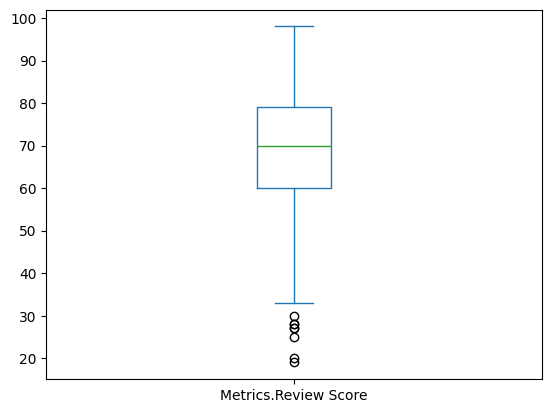

In [9]:
df_cleaned["Metrics.Review Score"].plot.box()
plt.show()

We see that there are outliers present in the `Metrics.Review Score` data. Though relatively few (compared to the next few boxplots), their presence will likely skew the conclusions and thus it would be beneficial to loose the representation of these points to avoid weakening the rest of the more relevant data's representation. Removing them from the dataset, we dropped 8 rows.

In [10]:
init_count = len(df_cleaned)
df_cleaned = df_cleaned[df_cleaned["Metrics.Review Score"] > 32]
init_count - len(df_cleaned)

8

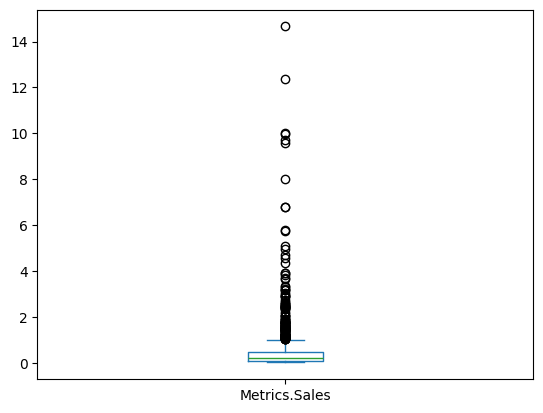

In [11]:
df_cleaned["Metrics.Sales"].plot.box()
plt.show()

We see that there are significant outliers present in the `Metrics.Sales` data, and the majority are distant from the rest of the data. Their presence will very likely skew the conclusions, perhaps showing more exaggerated trends than what would be expected of your typical game. Thus, it would be beneficial to loose the representation of these points to avoid weakening the rest of the more relevant data's representation. Removing them from the dataset, we dropped 52 rows.

In [12]:
init_count = len(df_cleaned)
df_cleaned = df_cleaned[df_cleaned["Metrics.Sales"] < 2] # 0.61, 4
init_count - len(df_cleaned)

52

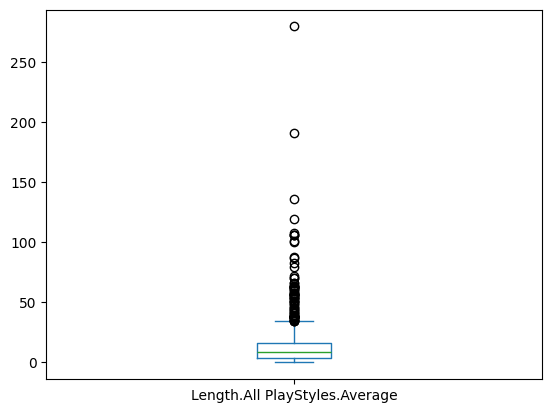

In [13]:
df_cleaned["Length.All PlayStyles.Average"].plot.box()
plt.show()

We see that there are significant outliers present in the `Length.All PlayStyles.Average` data, and the majority are distant from the rest of the data. Their presence will very likely skew the conclusions, perhaps showing more exaggerated trends than what would be expected of your typical game. Thus, it would be beneficial to loose the representation of these points to avoid weakening the rest of the more relevant data's representation. Removing them from the dataset, we dropped 47 rows.

In [14]:
init_count = len(df_cleaned)
df_cleaned = df_cleaned[df_cleaned["Length.All PlayStyles.Average"] < 50]
init_count - len(df_cleaned)

47

**Outlier Cleaning - Two Variable Outlier Inspection**

To check if there are any outliers present in the relationship between any pair of numerical variables, I will create a scatterplot of the all possible pairs (pairplot) below.

Here, we see that the previous single variable outlier inspection appears to have removed any extreme outliers, and thus there is no reason to clean any more data.

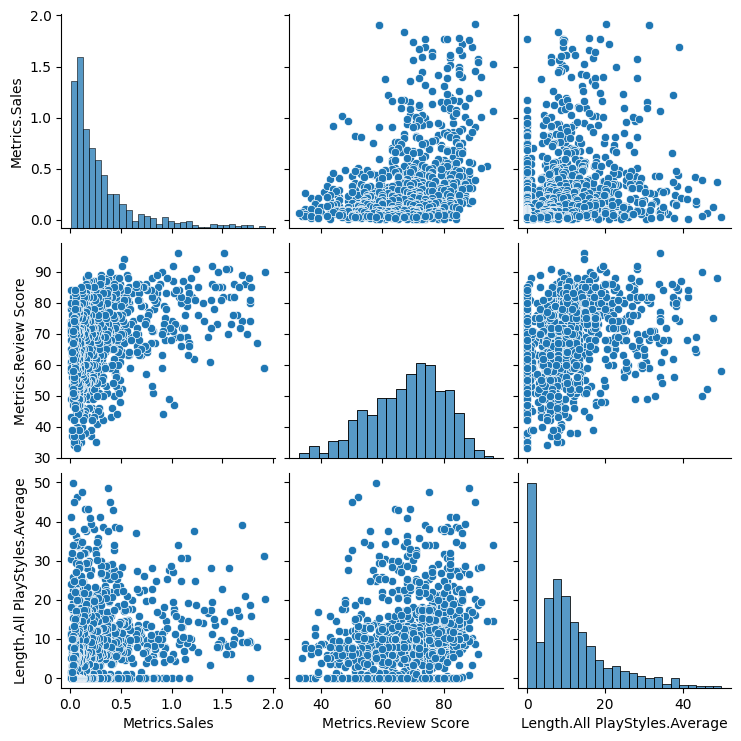

In [15]:
sns.pairplot(df_cleaned[["Metrics.Sales", "Metrics.Review Score", "Length.All PlayStyles.Average"]])

## 4. Preliminary Analysis

Here is a pairsplot for every pair of numerical variables in the cleaned dataset:

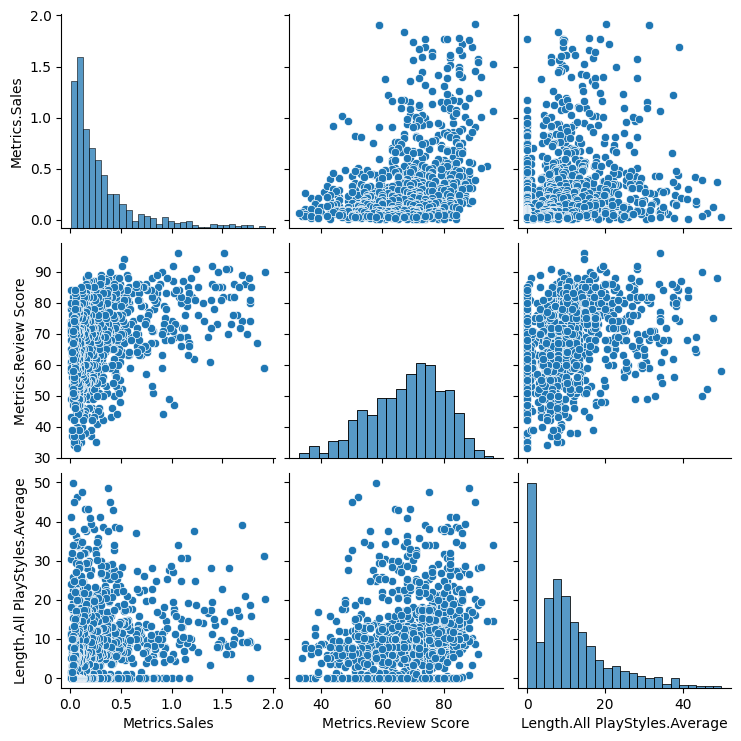

In [16]:
sns.pairplot(df_cleaned[["Metrics.Sales", "Metrics.Review Score", "Length.All PlayStyles.Average"]])

I renamed the variables to be simplier for convienience and because the orignal names' spacing causes problems for coding.

In [17]:
df_cleaned.rename(columns = {'Metrics.Sales':'Sales'}, inplace = True)
df_cleaned.rename(columns = {'Metrics.Review Score':'Review_Score'}, inplace = True)
df_cleaned.rename(columns = {'Features.Max Players':'Max_Players'}, inplace = True)
df_cleaned['Max_Players'] = df_cleaned['Max_Players'].astype(str)
df_cleaned.rename(columns = {'Release.Console':'Release_Console'}, inplace = True)
df_cleaned.rename(columns = {'Release.Rating':'Rating'}, inplace = True)
df_cleaned.rename(columns = {'Length.All PlayStyles.Average':'All_PlayStyles_Average'}, inplace = True)

In [18]:
lin_reg_model = smf.ols(formula='Sales~Review_Score+Max_Players+Release_Console+Rating+All_PlayStyles_Average', data=df_cleaned).fit()

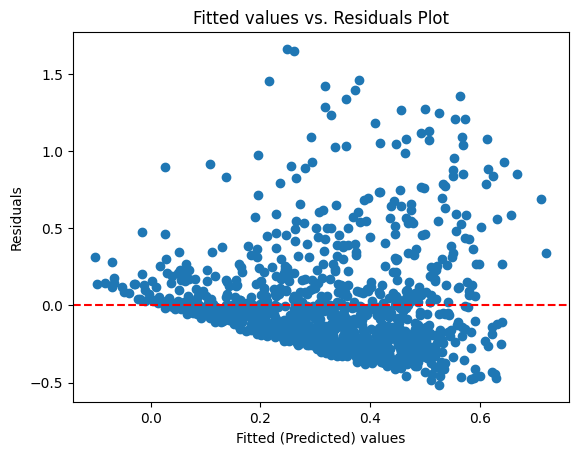

In [19]:
plt.scatter(lin_reg_model.fittedvalues, lin_reg_model.resid)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

Given that the Fitted values vs. Residuals Plot does not have an even distribution of positive and negative values for every x-axis window, this indicates that the data does not meet the linearity assumption (a linear regression model is not suitable since there is not a linear realtionship). Thus, I have reason to believe that some of the linear regression models may achieve a better fit (of either the training or the test dataset) if we were to first transform one or more of your variables in the cleaned dataset in order to meet the linearity assumption.

**Variable Transformation**

To try and make the dataset meet the linearity assumption, I decided to log transform the `Sales` variable.

Reevaluating the linearity assumption of this transformed model, we see that the distribution of positive and negative values in the Fitted values vs. Residuals Plot is much more even, indicating that the the linearity assumption is closer to beign met (a linear regression model is now more suitablable).

In [20]:
df_cleaned['log_Sales'] = np.log(df_cleaned['Sales'])

In [21]:
trans_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console+Rating+All_PlayStyles_Average', data=df_cleaned).fit()

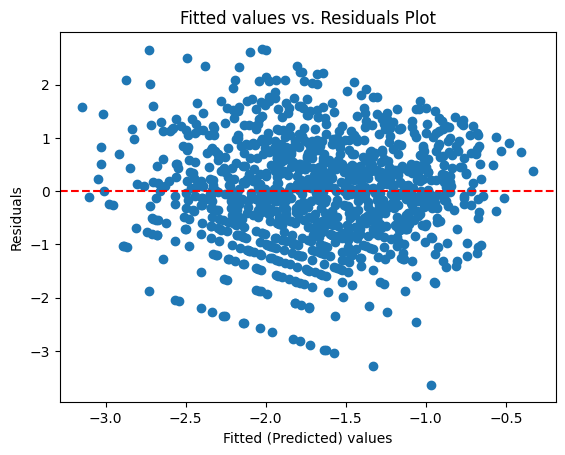

In [22]:
plt.scatter(trans_lin_reg_model.fittedvalues, trans_lin_reg_model.resid)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

**Interaction Terms**

Here, we will make a scatter plot for every numerical explanatory variable and categorical explanatory variable pair, using the best fit line for every distinct category to determine if there is an interaction between how a given numerical and catergoraical value impact the `log_Sales` value.

It seems that all pairs show some difference in slopes, so they all have some interaction.

We see below that the line of best fit between `Review_Score` and `log_Sales` changes between the value of `Max_Players`, thus there is likely a large interaction between the two explanatory variables.

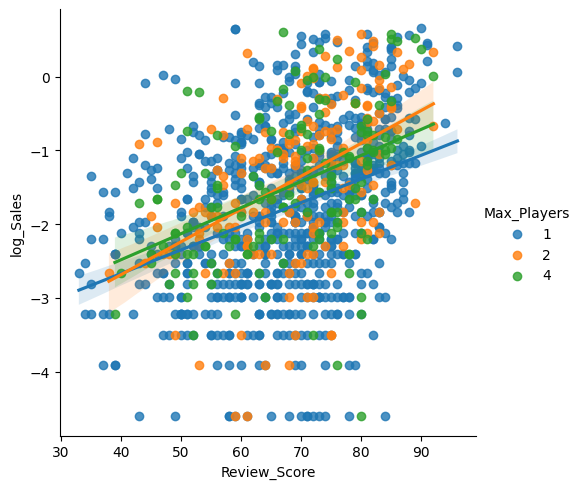

In [23]:
sns.lmplot(x='Review_Score', y='log_Sales', hue='Max_Players', data=df_cleaned)

We see below that the line of best fit between `Review_Score` and `log_Sales` changes between the value of `Release_Console`, thus there is likely a interaction between the two explanatory variables.

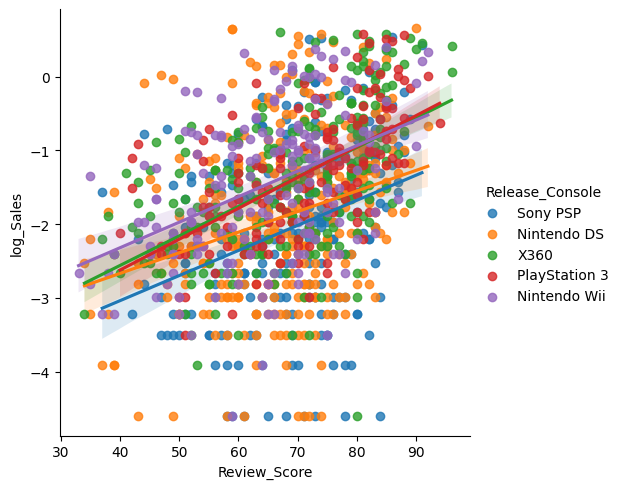

In [24]:
sns.lmplot(x='Review_Score', y='log_Sales',  hue='Release_Console', data=df_cleaned)

We see below that the line of best fit between `Review_Score` and `log_Sales` changes between the value of `Rating`, thus there is likely a large interaction between the two explanatory variables.

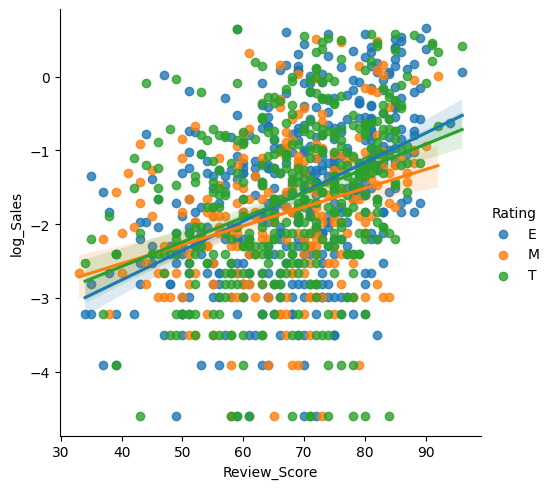

In [25]:
sns.lmplot(x='Review_Score', y='log_Sales',  hue='Rating', data=df_cleaned)

We see below that the line of best fit between `All_PlayStyles_Average` and `log_Sales` changes between the value of `Max_Players`, thus there is likely a large interaction between the two explanatory variables.

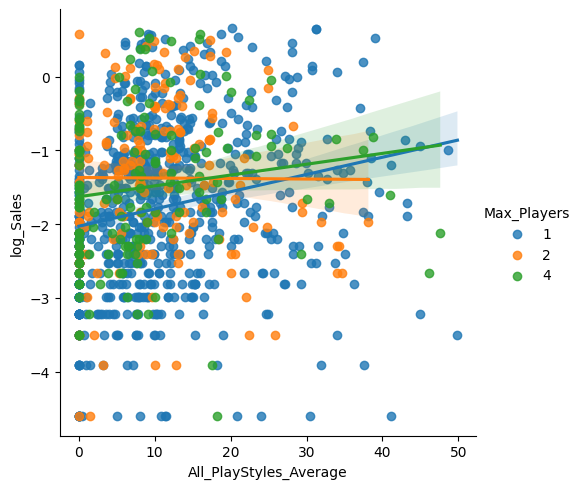

In [26]:
sns.lmplot(x='All_PlayStyles_Average', y='log_Sales', hue='Max_Players', data=df_cleaned)

We see below that the line of best fit between `All_PlayStyles_Average` and `log_Sales` changes between the value of `Release_Console`, thus there is likely a interaction between the two explanatory variables.

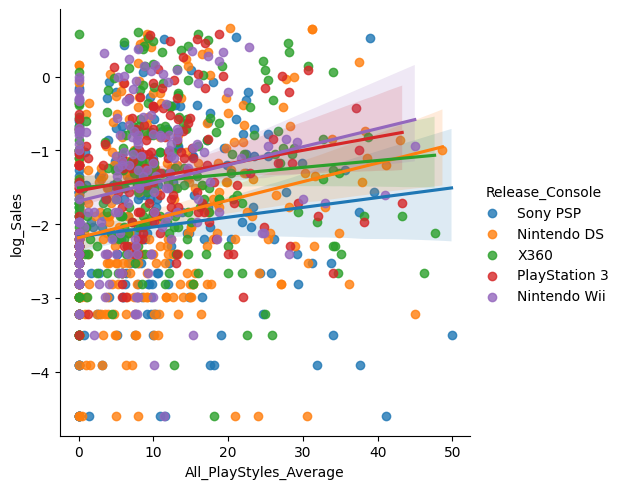

In [27]:
sns.lmplot(x='All_PlayStyles_Average', y='log_Sales', hue='Release_Console', data=df_cleaned)

We see below that the line of best fit between `All_PlayStyles_Average` and `log_Sales` changes between the value of `Rating`, thus there is likely a interaction between the two explanatory variables.

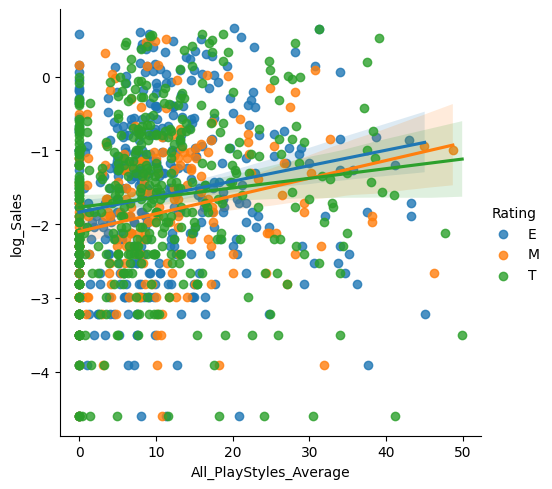

In [28]:
sns.lmplot(x='All_PlayStyles_Average', y='log_Sales', hue='Rating', data=df_cleaned)

## 5. Predictive Models

**Indicator Explanatory Variables (For Regularization)**

Since I don't plan to use regularization, I don't need to create 0/1 indicator explanatory variables for the categorical explanatory variables.

**Train-Test Split**

For this project, we'll use the train-test split method to help us select our best predictive model, we do so here.

In [29]:
df_train, df_test = train_test_split(df_cleaned, test_size=0.2, random_state=207)

**Scaling**

The data would need to be scaled if we plan on using LASSO or RIDGE regression in order to accurately interpret the magnitude of our slopes as representing how important the explanatory variable is when predicting the response variable. However, since I will be using the Backwards Elimination Algorithm, it is not needed. 
<!-- (as per https://piazza.com/class/lr8k4vnpz7v6sg/post/235) -->

**5.1. Non-Regularized Linear Regression Full Model**

Here, we fit a non-regularized linear regression model that uses all five of the explanatory variables and the transformed Sales variable, `log_Sales`.

The test R^2 value is 0.176765.

In [30]:
nonreg_lin_reg_full_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console+Rating+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = nonreg_lin_reg_full_model.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
r2_score(df_test['log_Sales'], y_pred_test)

0.1767652612689501

**5.2. Non-Regularized Linear Regression Full Model with Interaction Terms**

Here, we fit a non-regularized linear regression model that uses all five of the explanatory variables, the interaction terms that correspond to interactions, and the transformed Sales variable, `log_Sales`.

The test R^2 value is 0.176454 (barely less than the previous model).

In [31]:
int_scaled_lin_reg_model = smf.ols(
    formula='log_Sales~Review_Score+Max_Players+Release_Console+Rating+All_PlayStyles_Average+Review_Score*Max_Players+Review_Score*Release_Console+Review_Score*Rating+All_PlayStyles_Average*Max_Players+All_PlayStyles_Average*Release_Console+All_PlayStyles_Average*Rating', 
    data=df_train).fit()
y_pred_test = int_scaled_lin_reg_model.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
r2_score(df_test['log_Sales'], y_pred_test)

0.1764543683371259

We see that adding all possible interaction terms to the Non-Regularized Linear Regression Full Model does not increase the test R^2.

**5.3. Feature Selection**

Backwards Elimination Algorithm

In [32]:
init_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console+Rating+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = init_model.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
r2_score(df_test['log_Sales'], y_pred_test)

0.1767652612689501

In [33]:
model1 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Max_Players+Release_Console+Rating+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model1.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test))
model2 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Release_Console+Rating+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model2.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test))
model3 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Rating+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model3.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test))
model4 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model4.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test)) # new best R^2
model5 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console+Rating', data=df_train).fit()
y_pred_test = model5.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test))

0.10819715738701641
0.17524776621885285
0.11460517940428072
0.18014935798260256
0.16935894946003271


In [34]:
model41 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Max_Players+Release_Console+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model41.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test)) 
model42 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Release_Console+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model42.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test))
model43 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model43.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test)) 
model44 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console', data=df_train).fit()
y_pred_test = model44.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test)) 

0.1108102631443586
0.1786648344994919
0.11403681330397486
0.17324853912476212


Given that the test R^2 is no longer improving, the best model has been found:

In [35]:
model4 = scaled_lin_reg_model = smf.ols(formula='log_Sales~Review_Score+Max_Players+Release_Console+All_PlayStyles_Average', data=df_train).fit()
y_pred_test = model4.predict(df_test.drop(['log_Sales', 'Sales'], axis=1))
print(r2_score(df_test['log_Sales'], y_pred_test))

0.18014935798260256


In [36]:
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.2766,0.193,-22.135,0.000,-4.656,-3.897
Max_Players[T.2],0.0694,0.097,0.718,0.473,-0.120,0.259
Max_Players[T.4],0.0095,0.104,0.091,0.928,-0.196,0.214
Release_Console[T.Nintendo Wii],0.4986,0.116,4.299,0.000,0.271,0.726
Release_Console[T.PlayStation 3],0.3811,0.115,3.301,0.001,0.155,0.608
Release_Console[T.Sony PSP],-0.2200,0.098,-2.250,0.025,-0.412,-0.028
Release_Console[T.X360],0.3460,0.100,3.467,0.001,0.150,0.542
Review_Score,0.0351,0.003,12.611,0.000,0.030,0.041
All_PlayStyles_Average,0.0050,0.004,1.411,0.159,-0.002,0.012


## 6. Best Model Discussion

**Equation**

<!-- $ \hat{log(Sales)} = -1.8302 + 0.0694 * Max\_Players_2 + 0.0095 * Max\_Players_4 + 0.4986 * Release\_Console_{Nintendo Wii} + 0.3811 * Release\_Console_{PlayStation 3} -0.2200*Release\_Console_{Sony PSP} + 0.3460*Release\_Console_{X360} + 0.4325*Review\_Score + 0.0481*All\_PlayStyles\_Average$ -->

$ \hat{log(Sales)} = -4.2766 + 0.0694 * Max\_Players_2 + 0.0095 * Max\_Players_4 + 0.4986 * Release\_Console_{Nintendo Wii} + 0.3811 * Release\_Console_{PlayStation 3} -0.2200*Release\_Console_{Sony PSP} + 0.3460*Release\_Console_{X360} + 0.0351*Review\_Score + 0.0050*All\_PlayStyles\_Average$

**Test Dataset Fit**

With a very low test R^2 of 0.18, the overall fit of this "best" model is not good. 

**Overfitting Explanatory Variables**

Yes, given that the "best" model was obtained by dropping the `Rating` variable, it suggests that the inclusion of `Rating` was overfitting the model

**Multicollinearity**

Yes, as shown below, there is a strong correlation between the All_PlayStyles_Average and Review_Score (correlation coefficent of 0.866828) when considering a 2-player game released on the Nintendo DS.

**Slope Interpretations**

Given that I did not scale the numerical variables in this project, we are not able to interpret the magnitudes of the slopes as indicating how important the corresponding explanatory variable are when it comes to predicting your response variable in a linear regression model.

In [38]:
df_cleaned[['Review_Score','Max_Players','All_PlayStyles_Average','Release_Console']].groupby(['Release_Console','Max_Players']).corr()

Review_Score  \
Release_Console Max_Players                                        
Nintendo DS     1           Review_Score                1.000000   
                            All_PlayStyles_Average      0.237558   
                2           Review_Score                1.000000   
                            All_PlayStyles_Average      0.866828   
                4           Review_Score                     NaN   
                            All_PlayStyles_Average           NaN   
Nintendo Wii    1           Review_Score                1.000000   
                            All_PlayStyles_Average      0.471486   
                2           Review_Score                1.000000   
                            All_PlayStyles_Average      0.474404   
                4           Review_Score                1.000000   
                            All_PlayStyles_Average      0.118972   
PlayStation 3   1           Review_Score                1.000000   
                            All_PlayStyles_Average      0.427099   
                2           Review_Score                1.000000   
                            All_PlayStyles_Average      0.152275   
                4           Review_Score                1.000000   
                            All_PlayStyles_Average      0.460444   
Sony PSP        1           Review_Score                1.000000   
                            All_PlayStyles_Average      0.158942   
                2           Review_Score                1.000000   
                            All_PlayStyles_Average      0.318647   
                4           Review_Score                1.000000   
                            All_PlayStyles_Average      0.540921   
X360            1           Review_Score                1.000000   
                            All_PlayStyles_Average      0.291906   
                2           Review_Score                1.000000   
                            All_PlayStyles_Average      0.080381   
                4           Review_Score                1.000000   
                            All_PlayStyles_Average      0.216220   

                                                    All_PlayStyles_Average  
Release_Console Max_Players                                                 
Nintendo DS     1           Review_Score                          0.237558  
                            All_PlayStyles_Average                1.000000  
                2           Review_Score                          0.866828  
                            All_PlayStyles_Average                1.000000  
                4           Review_Score                               NaN  
                            All_PlayStyles_Average                     NaN  
Nintendo Wii    1           Review_Score                          0.471486  
                            All_PlayStyles_Average                1.000000  
                2           Review_Score                          0.474404  
                            All_PlayStyles_Average                1.000000  
                4           Review_Score                          0.118972  
                            All_PlayStyles_Average                1.000000  
PlayStation 3   1           Review_Score                          0.427099  
                            All_PlayStyles_Average                1.000000  
                2           Review_Score                          0.152275  
                            All_PlayStyles_Average                1.000000  
                4           Review_Score                          0.460444  
                            All_PlayStyles_Average                1.000000  
Sony PSP        1           Review_Score                          0.158942  
                            All_PlayStyles_Average                1.000000  
                2           Review_Score                          0.318647  
                            All_PlayStyles_Average                1.000000  
                4          

## 7. Conclusion

**Recommendation**

I, unfortunately, would not recommend my best model be used by professional game developers and marketers because of the very low test R^2, indicating that it does not perfrom well when predicting sales from their new data.

**Shortcomings/Caveats**

I do not know for sure that my chosen best model will yield the highest possible test R^2 because my process was limited by the many shortcomings listed here. There was much I could and could not have done that had the potential to change the outcome of this analysis:

One technique that a more "complete" analysis would have used would be going through multiple different feature selection algorithims and choosing the best model out of all algorithims. In this project, I only used one algorithm (Backwards Elimination Algorithm) with the base model only using five explanatory variables. This limited my ability to determine how important each explanatory variable was to predicting `Sales`, and made it a less "complete" analysis of possible models. I could of also done a bit more exploration into the interaction terms and if they could have performed better down the line of the Backwards Elimination Algorithm since the full interation model has a very close test R^2, it might have been worth looking into.

Another major shortcoming of this analysis was that a decently large portion of the original dataset was not ultimately considered. As shown below, about 10% of the original dataset was dropped. This may have tweaked the choice of the best model since many observations were not included in the fitting of the final model. Game developers/marketers with games that more closely align with the games whose rows were dropped during the dataset cleaning may not fully trust the predictions of the 'best' model since similar games were not considered in the fitting of the model.

There is also the fact that the dataset itself was somewhat limited to begin with. I could have searched for a more modern and inclusive dataset that would have better represented the current game scene. This would make the conclusions more relevant and applicable to current day game developers/marketers.

**Future Work**

For future work, I would consider exploring other methods of feature selection, including exploring interaction terms in the model. I would also consider looking at other explanatory variables that I had not previously considered at all, since the ones I used wer chosed just out of what I felt would have contributed the most at face value. This would allow for the possibility of finding a more powerful model that would be more useful to professional game developers/marketers.

In [ ]:
(len(df) - len(df_cleaned)) / len(df)

0.10231023102310231